<a href="https://colab.research.google.com/github/axel-sirota/normalise-data-pandas/blob/main/module3/NormaliseDataPandas_Mod3Demo2_MinMaxScaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apply min-max scaling on Pandas

## Prep

To start things, let's download the same dataset as before, and check what does Standard Scaler does vs MinMax Scaler

In [37]:
%%writefile get_data.sh
if [ ! -f data.csv ]; then
  wget -O data.csv https://raw.githubusercontent.com/axel-sirota/normalise-data-pandas/main/data/data.csv
fi

Overwriting get_data.sh


In [38]:
!bash get_data.sh

In [39]:
import pandas as pd
import numpy as np
import sklearn

data = pd.read_csv('data.csv')
data

,uniform_negative,uniform_positive,normal
0,-3.776188,6.666627,3.253714
1,-4.856584,3.437850,2.436924
2,-3.444649,3.844239,5.644002
3,-4.716353,7.082680,2.388518
4,-4.179619,3.576941,6.439704
...,...,...,...
4995,-3.475292,11.878456,6.403464
4996,-3.000431,10.887165,4.765301
4997,-1.430485,9.745799,4.457029
4998,-2.616039,3.713145,4.751464


In [40]:
data.describe()

,uniform_negative,uniform_positive,normal
count,5000.000000,5000.000000,5000.000000
mean,-2.990926,7.992664,4.992618
std,1.139189,2.882320,2.024932
min,-4.998775,3.000098,-1.686932
25%,-3.966516,5.490951,3.629852
50%,-2.947714,7.964376,5.026905
75%,-2.021868,10.471890,6.370167
max,-1.001237,12.994690,11.536840


## Normalising: 4-step guide

To put everything into the same scale, we normalise. We will create 2 dataframes, one with the standard scaler and one with the minmax

### Step 1: Import

In [41]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


### Step 2: Instantiate the Scaler

In [42]:
scaler = StandardScaler()
minmax = MinMaxScaler()

### Step 3: Fit the dataset

In [43]:
scaler.fit(data)
minmax.fit(data)

MinMaxScaler()

### Step 4: Transform the data

In [44]:
standard_data = scaler.transform(data)
minmax_data = minmax.transform(data)

Remember the output is a numpy array, so we will recreate the Pandas DataFrame from it

In [45]:
standard_df = pd.DataFrame(standard_data, columns=data.columns)
minmax_df = pd.DataFrame(minmax_data, columns=data.columns)


## Analising the results

In [46]:
standard_df.describe()

,uniform_negative,uniform_positive,normal
count,5.000000e+03,5.000000e+03,5.000000e+03
mean,-1.545430e-16,-2.316369e-16,-3.716139e-16
std,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.762701e+00,-1.732307e+00,-3.298983e+00
25%,-8.564761e-01,-8.680379e-01,-6.730611e-01
50%,3.793572e-02,-9.815252e-03,1.693394e-02
75%,8.507411e-01,8.602357e-01,6.803619e-01
max,1.746758e+00,1.735590e+00,3.232146e+00


In [47]:
minmax_df.describe()

,uniform_negative,uniform_positive,normal
count,5000.000000,5000.000000,5000.000000
mean,0.502271,0.499527,0.505117
std,0.284973,0.288388,0.153128
min,0.000000,0.000000,0.000000
25%,0.258224,0.249220,0.402063
50%,0.513081,0.496696,0.507710
75%,0.744685,0.747584,0.609289
max,1.000000,1.000000,1.000000


<Axes: >

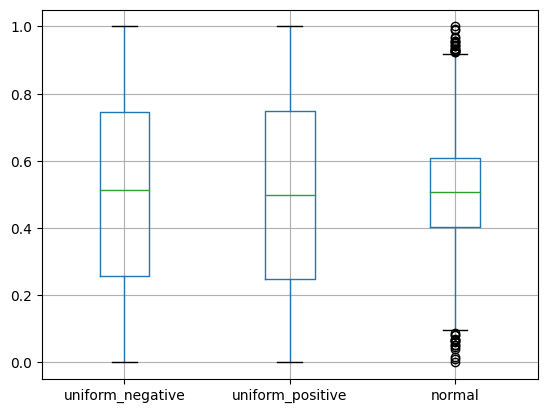

In [48]:
minmax_df.boxplot()

Now the boxplot and describe shows everything is in the same range 0-1, with differences in the distribution between uniform and normal. Let's see the distributions with a density plot, both from before and after

Text(0.5, 1.0, 'Min Max Normalisation')

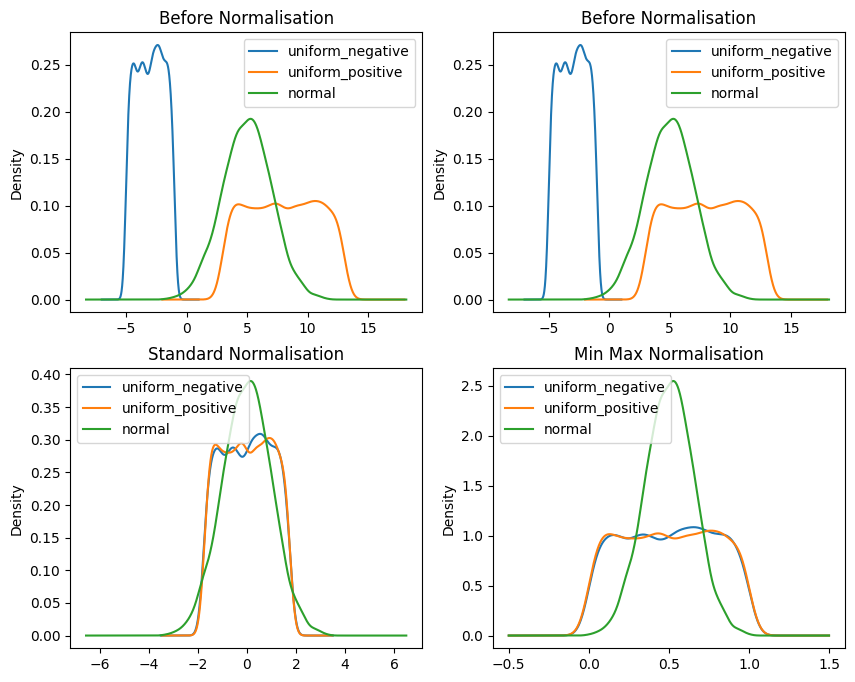

In [49]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,2, figsize=(10,8))
data.plot(ax=axes[0][0], kind='density')
axes[0][0].set_title("Before Normalisation")

data.plot(ax=axes[0][1], kind='density')
axes[0][1].set_title("Before Normalisation")

standard_df.plot(ax=axes[1][0], kind='density')
axes[1][0].set_title("Standard Normalisation")

minmax_df.plot(ax=axes[1][1], kind='density')
axes[1][1].set_title("Min Max Normalisation")

The main difference between both normalisation techniques is that the standard one keeps the shape of the distribution and alters the variance "accordingly". On the other hand, minmax is much more abrupt in forcing the range to `[0,1]`, therefore making both distributions indistinguishable 

## Some interesting features of these scalers

In [50]:
new_point = pd.DataFrame(np.array([500000,500000,500000]).reshape(1, 3), columns=data.columns)
new_data = pd.concat([data, new_point], axis=0).reset_index(drop=True)

In [51]:
new_scaled_df  = pd.DataFrame(scaler.fit_transform(new_data), columns=new_data.columns)
new_minmax_df  = pd.DataFrame(minmax.fit_transform(new_data), columns=new_data.columns)

Text(0.5, 1.0, 'Min Max Normalisation')

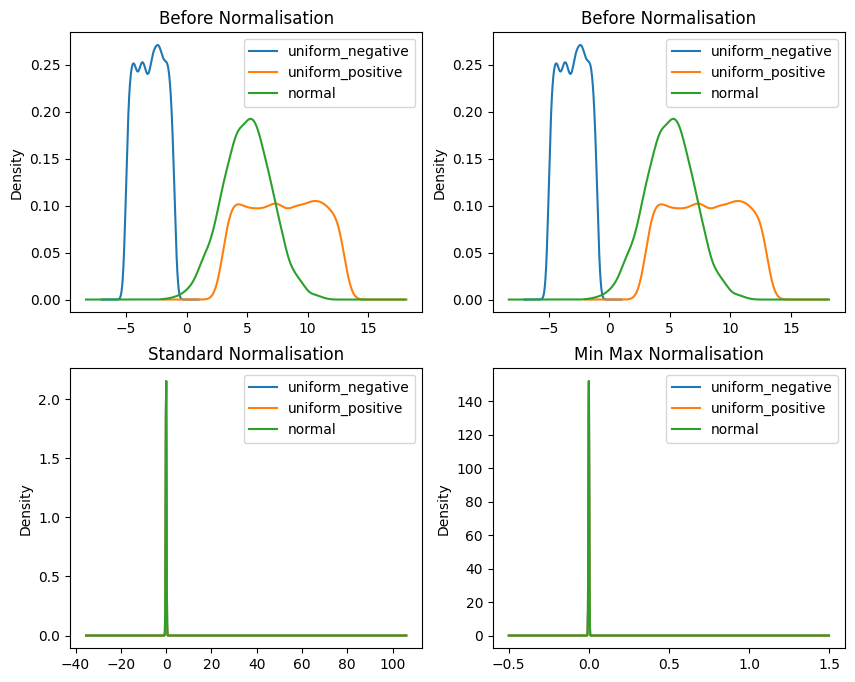

In [52]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,2, figsize=(10,8))
data.plot(ax=axes[0][0], kind='density')
axes[0][0].set_title("Before Normalisation")

data.plot(ax=axes[0][1], kind='density')
axes[0][1].set_title("Before Normalisation")

new_scaled_df.plot(ax=axes[1][0], kind='density')
axes[1][0].set_title("Standard Normalisation")

new_minmax_df.plot(ax=axes[1][1], kind='density')
axes[1][1].set_title("Min Max Normalisation")